In [1]:
import numpy as np 
import matplotlib.pyplot as plt

**function for test**

In [2]:
def func(x1, x2):
    return (x1**2 + x2 - 11)**2 + (2*x1 + x2**2 - 7)**2

**Gradient**

In [3]:
def func_Gradient(x1, x2):
    return (2 * x1 , 4 * x2)

Optimizers class 

In [4]:
class Optimizer:

    def __init__(self, learning_schedul, rate=0.01):
        self.learning_schedul = self.learning_rate(learning_schedul, rate)
        
    def learning_rate(self, learning_schedul, rate):
        if learning_schedul == 'constant':
            return self.constant_learning(rate)
        
        
    def constant_learning(self, rate):
        return rate
    
    def gd_optimizer(self, x1, x2, y1, y2, func_Gradient):
        x1_Gradient, x2_Gradient = func_Gradient(x1, x2)
        return x1 - self.learning_schedul * x1_Gradient , x2 - self.learning_schedul * x2_Gradient, 0, 0
    
    def sgd_optimizer(self, x1, x2, y1, y2, func_Gradient):
        x1_Gradient, x2_Gradient = func_Gradient(x1, x2)
        x1_Gradient += np.random.normal(0, 1)
        x2_Gradient += np.random.normal(0, 1)
        return x1 - self.learning_schedul * x1_Gradient , x2 - self.learning_schedul * x2_Gradient, 0, 0 
    
    def gd_momentum(self, x1, x2, y1, y2, func_Gradient, alpha=0.9):
        x1_Gradient, x2_Gradient = func_Gradient(x1, x2)
        y1 = alpha * y1 - self.learning_schedul * x1_Gradient
        y2 = alpha * y2 - self.learning_schedul * x2_Gradient 
        return x1 + y1 , x2 + y2 , y1 , y2
    
    def nesterov_gd_momentum(self, x1, x2, y1, y2, func_Gradient, alpha=0.9):
        x1 += alpha * y1
        x2 += alpha * y2 
        x1_Gradient, x2_Gradient = func_Gradient(x1, x2)
        y1 = alpha * y1 - self.learning_schedul * x1_Gradient
        y2 = alpha * y2 - self.learning_schedul * x2_Gradient 
        
        return x1 + y1, x2 + y2 , y1, y2
    
    def ada_grad(self, x1, x2, y1, y2, func_Gradient, delta=1e-7):
        x1_gradient , x2_gradient = func_Gradient(x1, x2)
        y1 += x1_gradient**2 
        y2 += x2_gradient**2
        x1 = self.learning_schedul/(delta+np.sqrt(y1))*x1_gradient
        x2 = self.learning_schedul/(delta+np.sqrt(y2))*x2_gradient
        return x1, x2, y1, y2
    
    def rms_prop(self, x1, x2, y1, y2, func_Gradient, delta= 1e-7, rho= 0.9):
        x1_gradient , x2_gradient = func_Gradient(x1, x2)
        y1= rho * y1 + (1-rho) * x1_gradient ** 2
        y2= rho * y2 + (1-rho) * x2_gradient ** 2
        x1 -= self.learning_schedul / np.sqrt(delta + rho) * x1_gradient
        x2 -= self.learning_schedul / np.sqrt(delta + rho) * x2_gradient
        return x1, x2, y1, y2
    
    def nesterov_rmsprop_momentum(self, x1, x2, y1, y2,v1,v2, func_Gradient, delta= 1e-7, rho= 0.9, alpha= 0.9):
        x1 += alpha * v1
        x2 += alpha * v2 
        x1_Gradient, x2_Gradient = func_Gradient(x1, x2)
        y1 = y1 * rho + (1-rho) * x1_Gradient ** 2
        y2 = y2 * rho + (1-rho) * x1_Gradient ** 2
        v1 = alpha * v1 - self.learning_schedul/ (delta + np.sqrt(y1)) * x1_Gradient
        v2 = alpha * v2 - self.learning_schedul/ (delta + np.sqrt(y2)) * x2_Gradient
        x1 += v1
        x2 += v1
        return x1, x2, y1, y2, v1, v2

In [5]:
def search(optimizer, func_Gradient, iteration=10):
    x1, x2, y1, y2 = -4 ,+5, 0, 0 
    x_itration = [(x1, x2)]
    for i in range(iteration):
        x1, x2, y1, y2 = optimizer(x1, x2, y1, y2, func_Gradient)
        x_itration.append((x1, x2))
    print(f'itration : {i+1} x1 : {x1} x2 : {x2}')
    return x_itration

In [6]:
def search_rms_nestrov(optimizer, func_Gradient, iteration=10):
    x1, x2, y1, y2, v1, v2 = -4 ,+5, 0, 0 , 0, 0
    x_itration = [(x1, x2)]
    for i in range(iteration):
        x1, x2, y1, y2, v1, v2 = optimizer(x1, x2, y1, y2, v1, v2,  func_Gradient)
        x_itration.append((x1, x2))
    print(f'itration : {i+1} x1 : {x1} x2 : {x2}')
    return x_itration

In [7]:
def graph(func, x_itration):

    
    x1, x2 = np.meshgrid(np.arange(-5, 5, 0.1), np.arange(-5, 5, 0.1))
    z = np.arange(-5, 5, 0.1)
    Z = func(x1  , x2 )/100
    ax = plt.axes(projection='3d')
    
    
    fig = plt.figure()
    ax.view_init(30, 110)
    
    
    
    ax.plot_surface(x1, x2, Z, cmap='jet',)
    
    ax.scatter(*zip(*x_itration),5, '-o', color='r')
    
    
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
 


gradient_descent
itration : 10 x1 : -0.5497921253438425 x2 : 0.057646075230342354


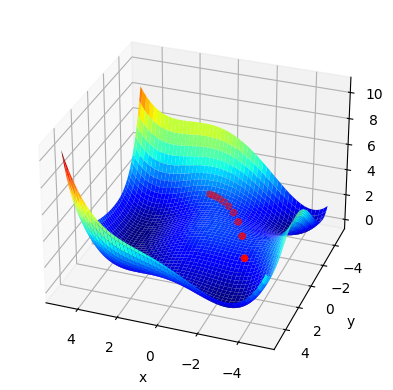

<Figure size 640x480 with 0 Axes>

In [8]:
optimizer = Optimizer('constant', 0.09)
print('gradient_descent')
graph(func, search(optimizer.gd_optimizer, func_Gradient))


stochastic_gradient_descent
itration : 10 x1 : -0.3634253932320834 x2 : 0.0964273585804016


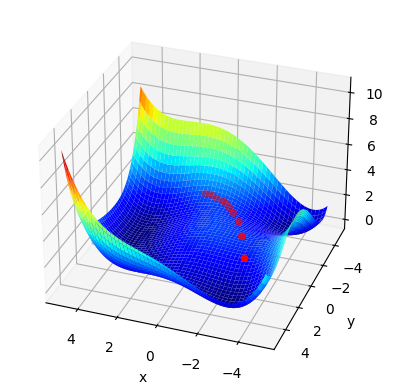

<Figure size 640x480 with 0 Axes>

In [9]:
optimizer = Optimizer('constant', 0.09)
print('stochastic_gradient_descent')
graph(func, search(optimizer.sgd_optimizer, func_Gradient))

gradient_descent_momentum
itration : 10 x1 : 0.5976901610953014 x2 : 2.9805933615328373


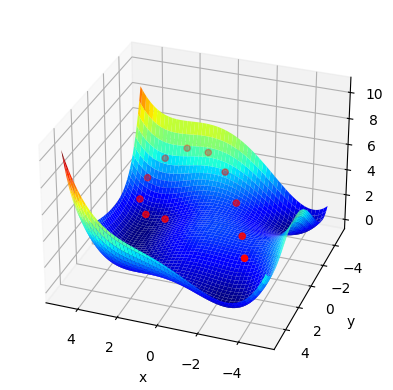

<Figure size 640x480 with 0 Axes>

In [10]:
optimizer = Optimizer('constant', 0.09)
print('gradient_descent_momentum')
graph(func, search(optimizer.gd_momentum, func_Gradient))

neserov_gradient_descent_momentum
itration : 10 x1 : -2.2732887554689585 x2 : -2.227109634198798


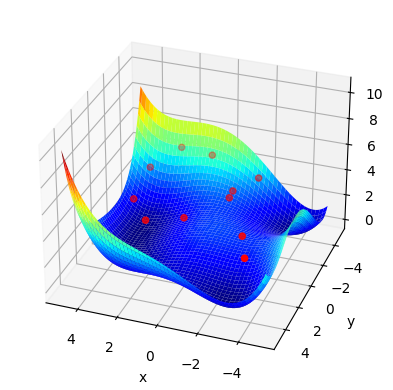

<Figure size 640x480 with 0 Axes>

In [11]:
optimizer = Optimizer('constant', 0.09)
print('neserov_gradient_descent_momentum')
graph(func, search(optimizer.nesterov_gd_momentum, func_Gradient))

ada_grad
itration : 10 x1 : -0.08553669379064723 x2 : 0.0616724694607994


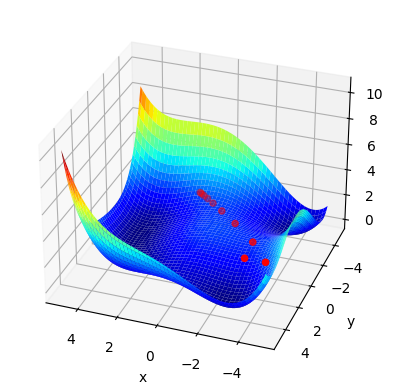

<Figure size 640x480 with 0 Axes>

In [12]:
optimizer = Optimizer('constant', 5)
print('ada_grad')
graph(func, search(optimizer.ada_grad, func_Gradient))

rms_prop
itration : 10 x1 : -0.4878900360946152 x2 : 0.04232283466235873


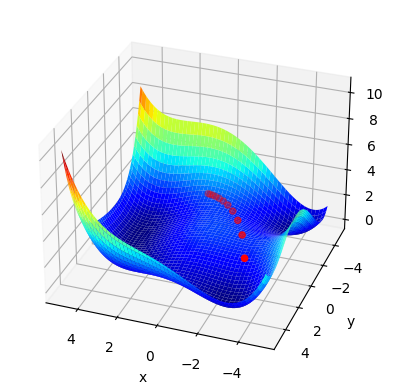

<Figure size 640x480 with 0 Axes>

In [13]:
optimizer = Optimizer('constant', 0.09)
print('rms_prop')
graph(func, search(optimizer.rms_prop, func_Gradient))

rms_prop
itration : 10 x1 : -0.4878900360946152 x2 : 0.04232283466235873


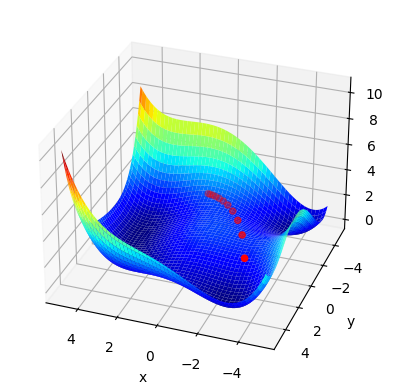

<Figure size 640x480 with 0 Axes>

In [14]:
optimizer = Optimizer('constant', 0.09)
print('rms_prop')
graph(func, search(optimizer.rms_prop, func_Gradient))

nesterov_rmsprop_momentum
itration : 10 x1 : 2.3434020134927325 x2 : -2.7995660907334066


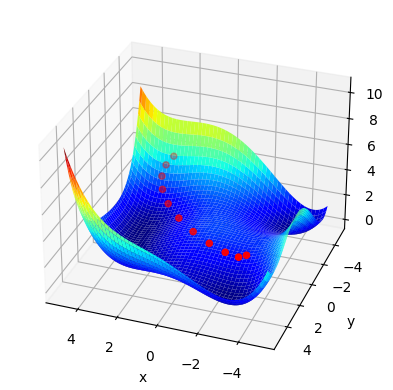

<Figure size 640x480 with 0 Axes>

In [15]:
optimizer = Optimizer('constant', 0.09)
print('nesterov_rmsprop_momentum')
graph(func, search_rms_nestrov(optimizer.nesterov_rmsprop_momentum, func_Gradient))